# Customer Segmentation using K-Means Clustering

## **understanding the problem**
* imagine you own a mall and you want to get insights on your countomers and understand which types of customers buys items in the mall and which don't and which group buy more and less. which will help the mall to make better business decisions

### Loading data

In [1]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# checking the data types and if there is any null values
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Data feilds explained
* **CustomerID** : Unique ID assigned to the customer
* **Gender** : Gender of the customer
* **Age** :Age of the customer
* **Annual Income (k$)** : Annual Income of the customee
* **Spending Score (1-100)** : Score assigned by the mall based on customer behavior and spending nature

### Pre-processing

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Here we going to get the required columns for clustering. we dont need CustomerID since that doesn't define anything other the the order and also we gonna skip Gender and age since we are going to group customers based on their spending. both Annual Income and Spending Score

In [11]:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values

Finding the optimum number of clusters for this dataset, for that we going to use 'the Elbow method'

In [12]:
wcss = [] # Within Clusters Sum of Squares
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

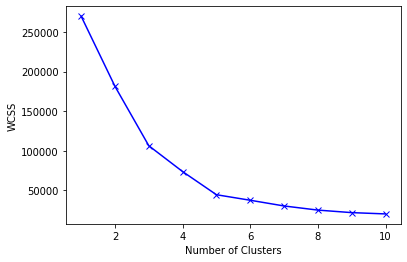

In [13]:
# plot an elbow graph
plt.plot(range(1,11), wcss,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Number of Clusters = 5

### Modelling

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

y_kmeans = kmeans.fit_predict(X) # training 

print(np.unique(y_kmeans)) 
# 5 Clusters - 0, 1, 2, 3, 4

[0 1 2 3 4]


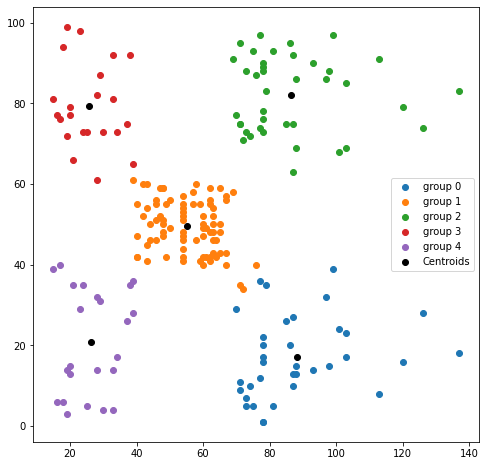

In [15]:
# plotting the results
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],  label = 'group 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], label = 'group 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], label = 'group 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], label = 'group 3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], label = 'group 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color="black", label = 'Centroids')

plt.legend()
plt.show()